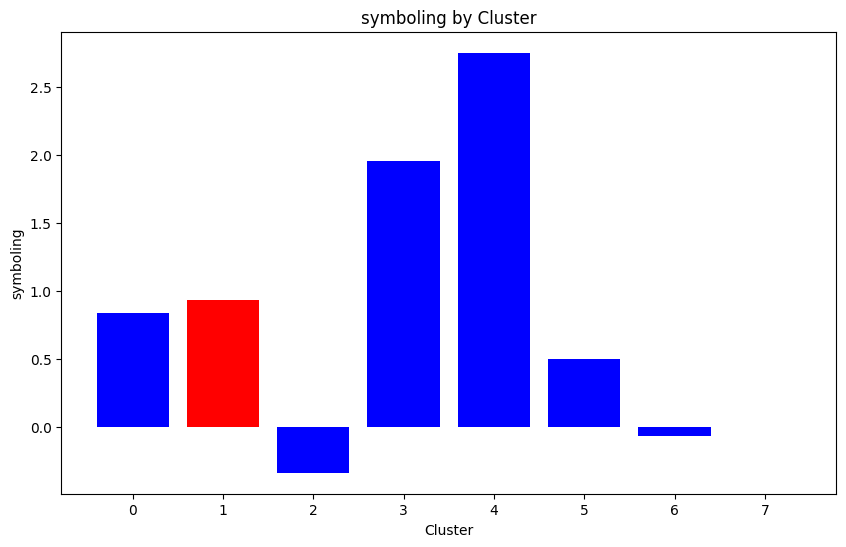

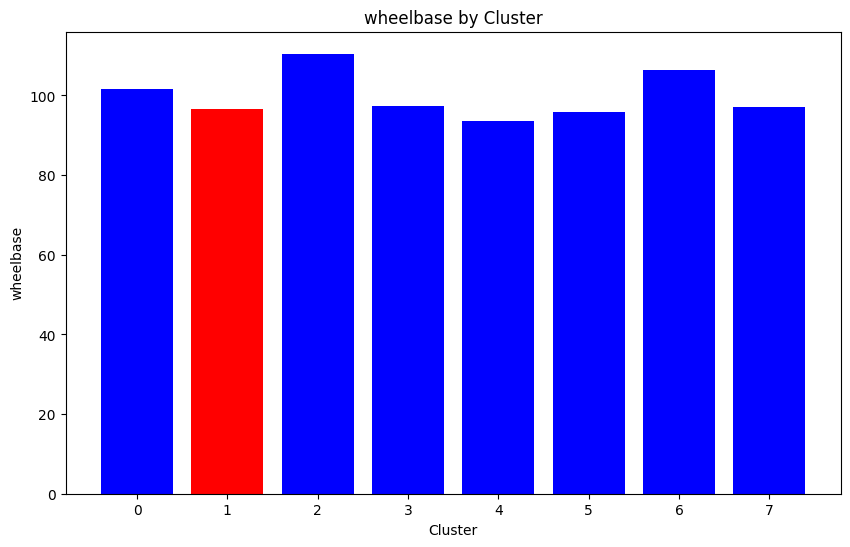

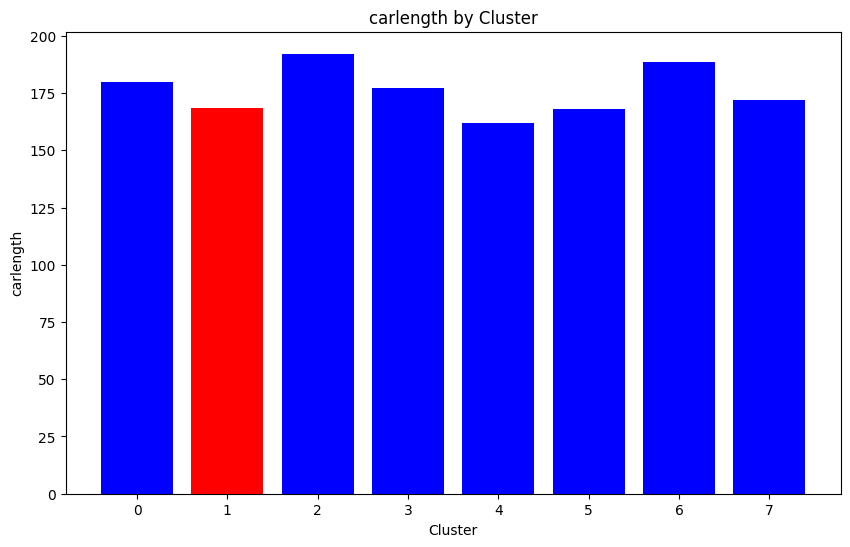

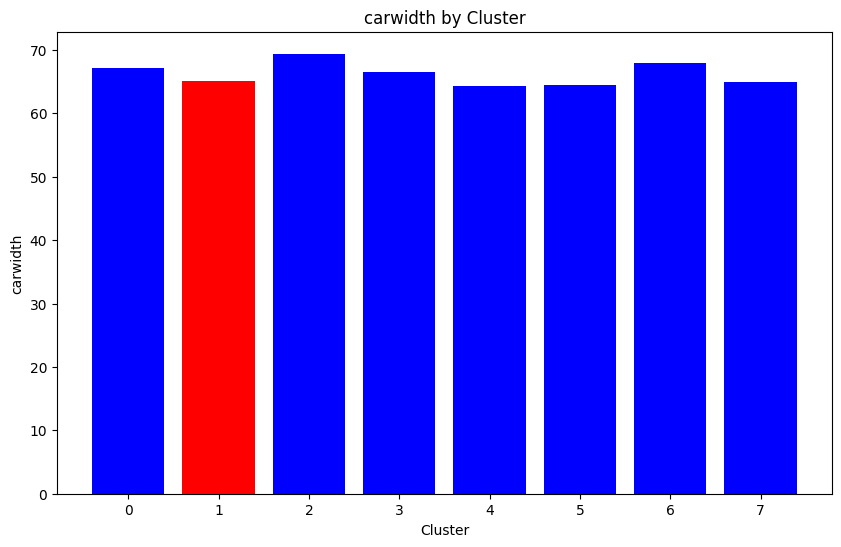

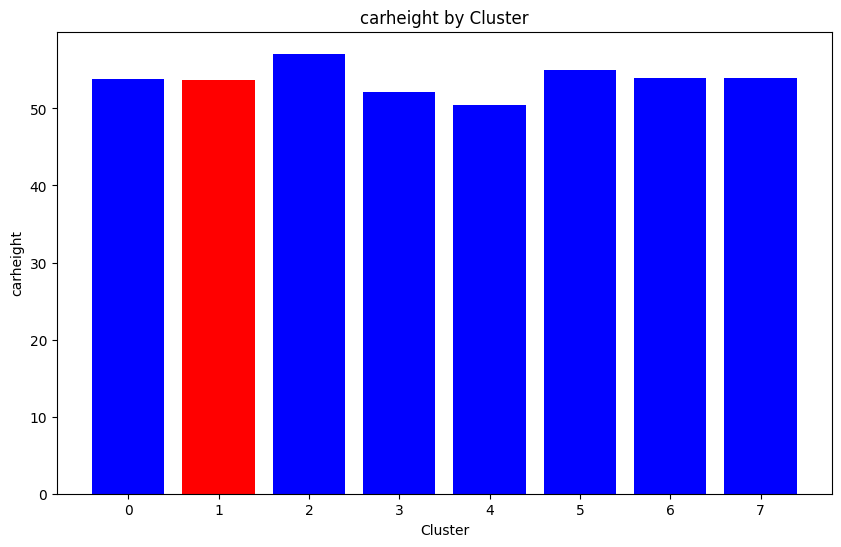

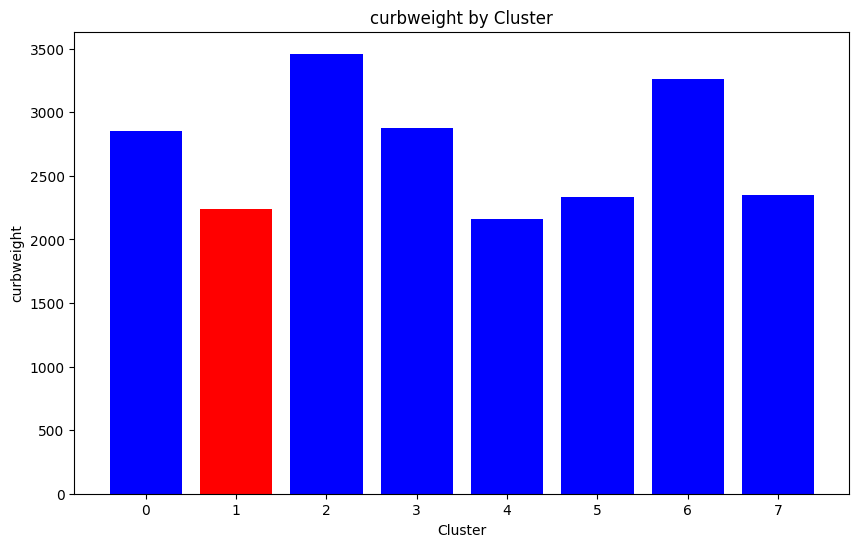

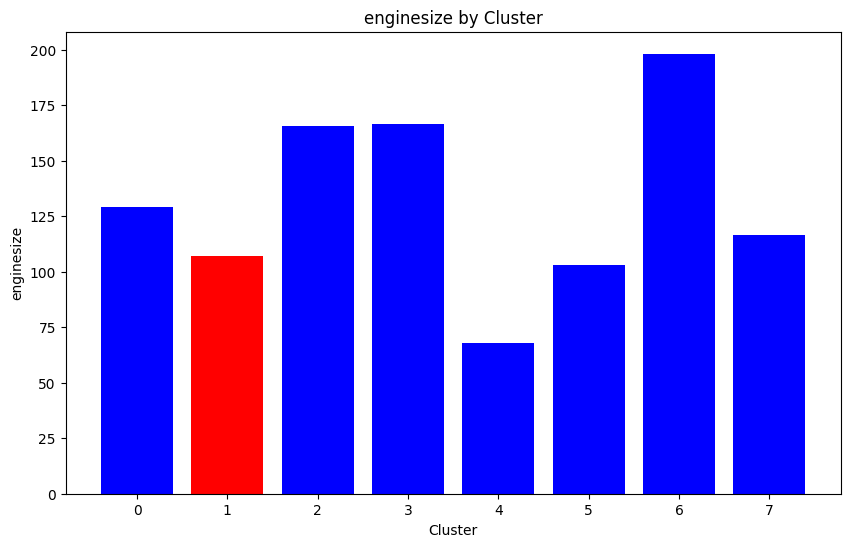

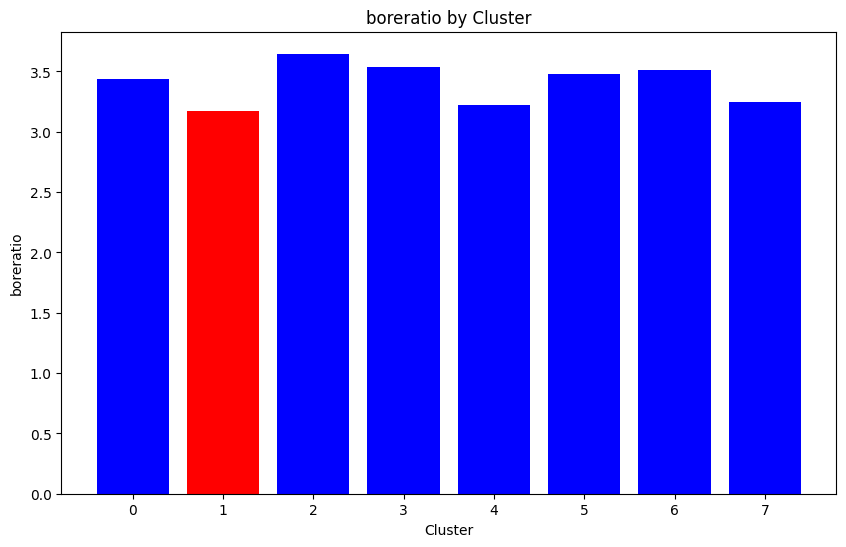

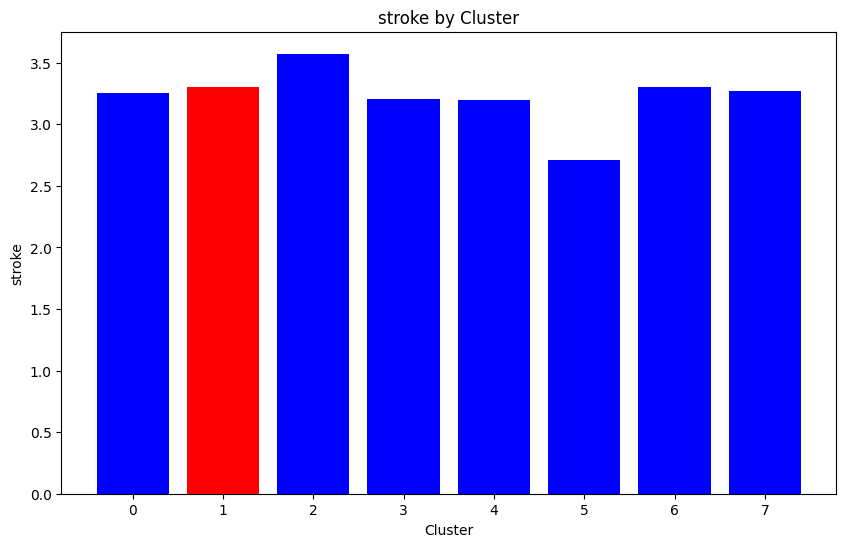

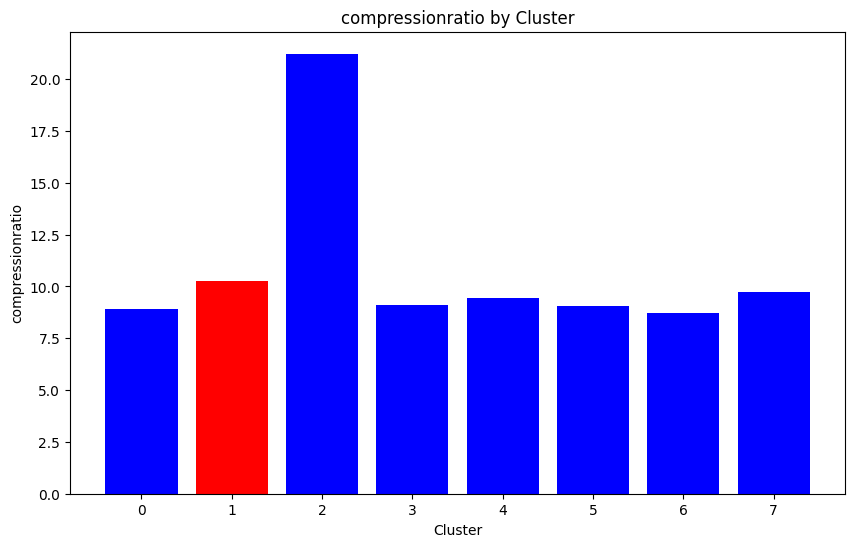

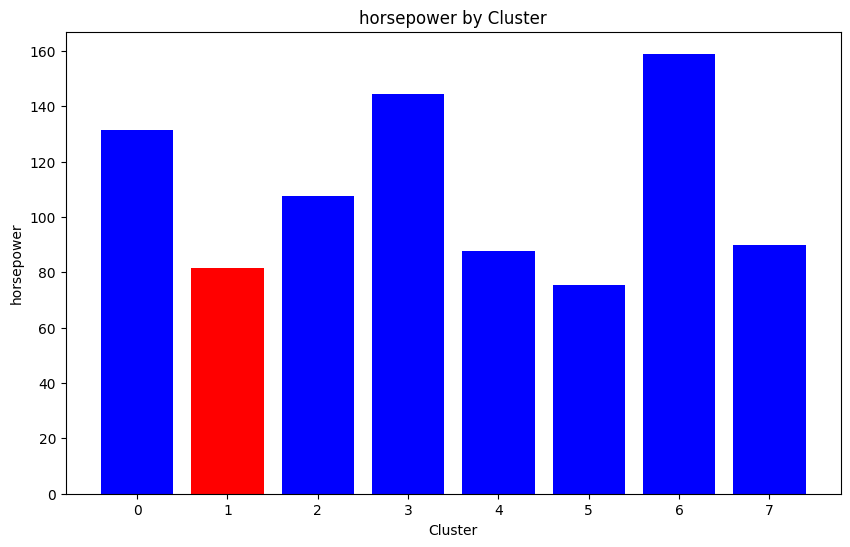

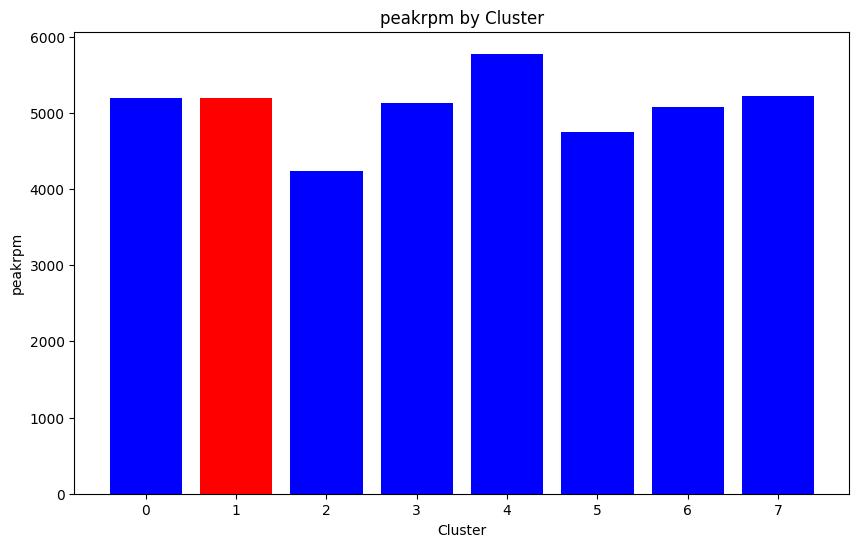

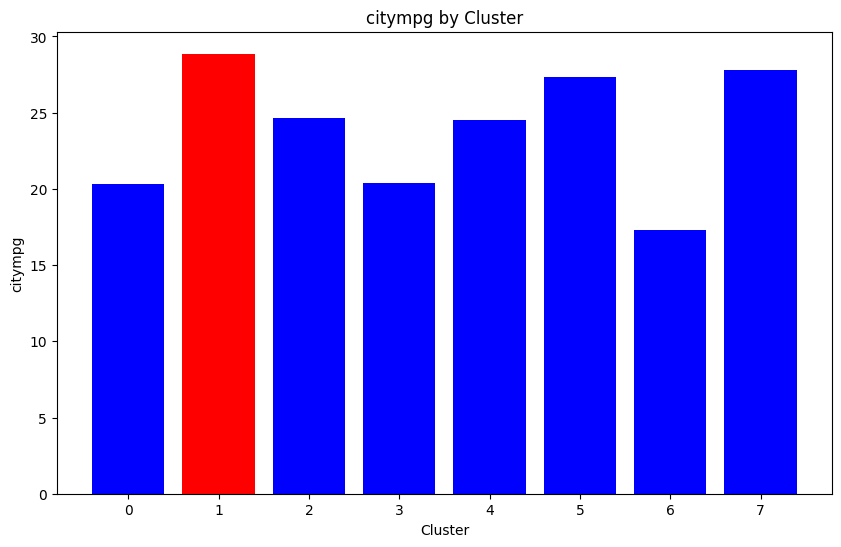

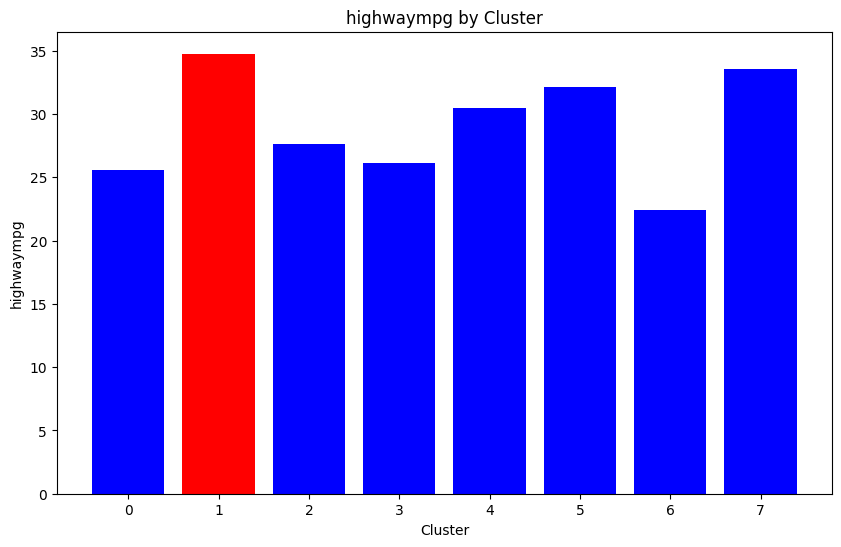

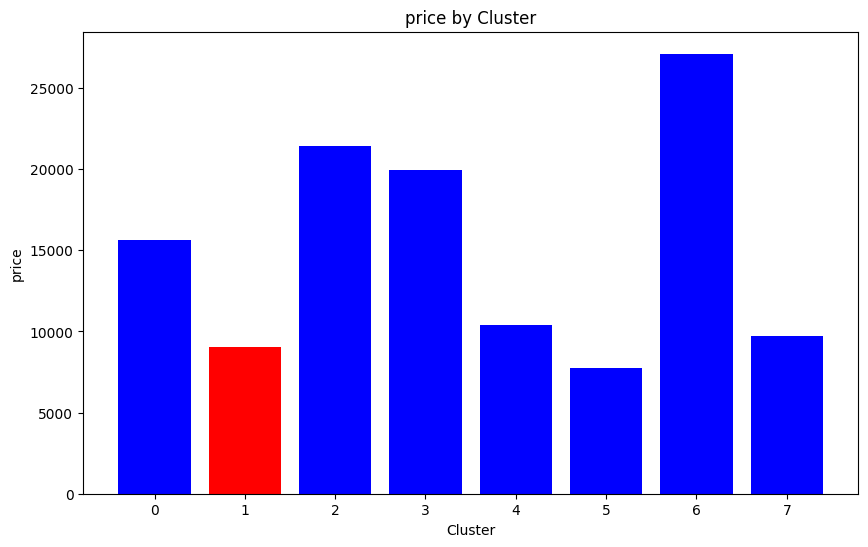

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import torch
import torch.nn as nn
import torch.optim as optim
import math
import os

df_origin = pd.read_csv('kmeans_clustered_cars.csv')
# df_origin = pd.read_csv('agglomerative_clustered_cars.csv')
df_origin.rename(columns={'KMeans_Cluster': 'cluster'}, inplace=True)
# df_origin.rename(columns={'Agglomerative_Cluster': 'cluster'}, inplace=True)
vw_cluster = df_origin[df_origin['CarName'].str.contains('volkswagen')]['cluster'].mode()[0]
df_vw = df_origin[df_origin['cluster'] == vw_cluster]
df_numeric = df_origin.select_dtypes(exclude='object').drop('car_ID', axis=1)

cluster_means = df_numeric.groupby('cluster').mean()
for column in cluster_means.columns:
    plt.figure(figsize=(10, 6))
    bars = plt.bar(cluster_means.index, cluster_means[column], color=['r' if cluster == vw_cluster else 'b' for cluster in cluster_means.index])
    plt.xlabel('Cluster')
    plt.ylabel(df_numeric[column].name)
    plt.title(f'{df_numeric[column].name} by Cluster')

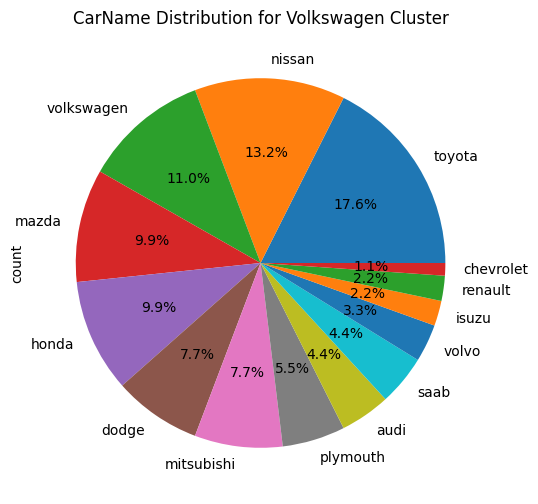

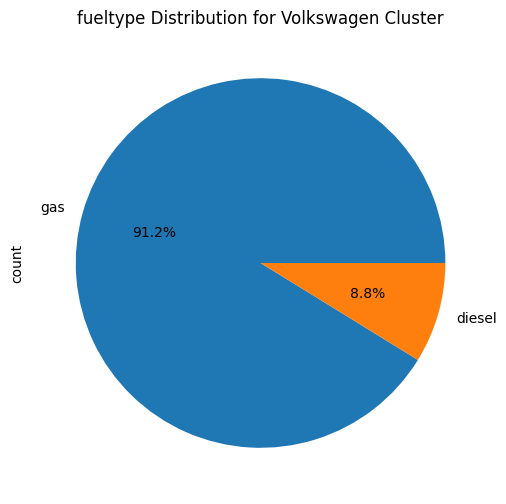

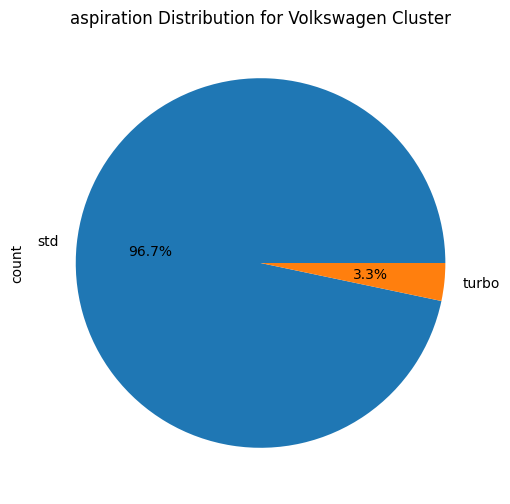

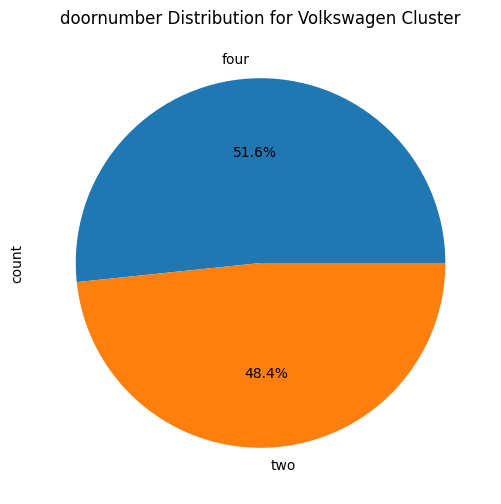

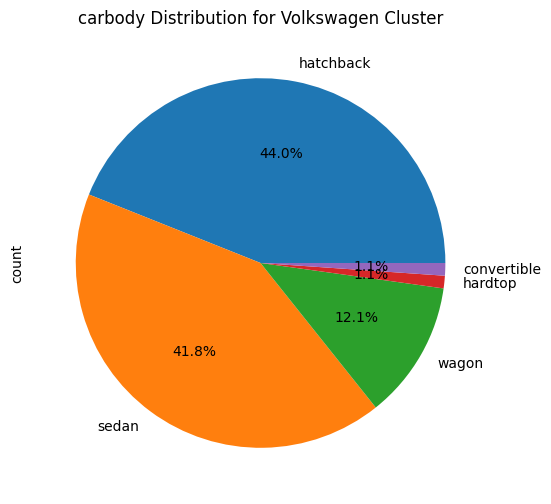

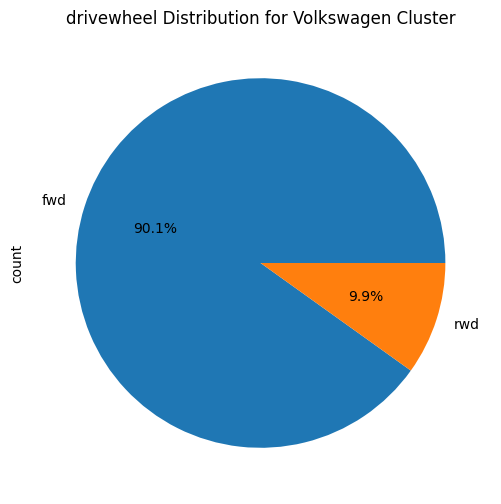

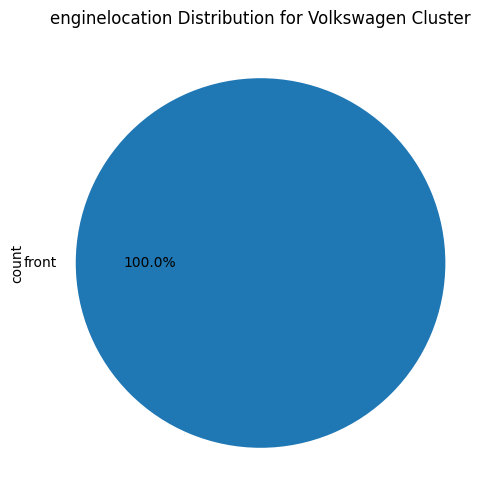

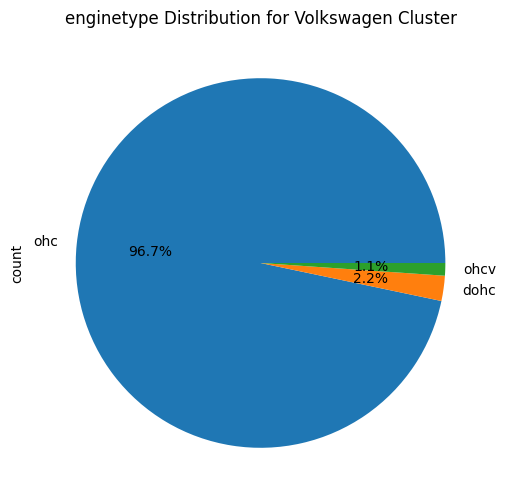

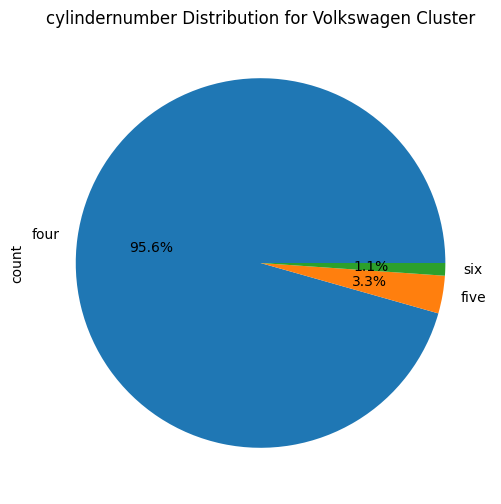

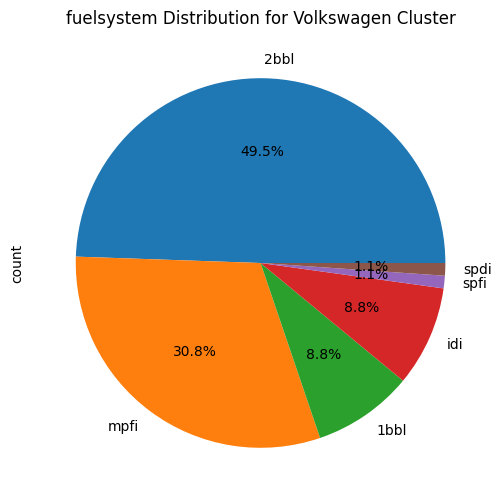

In [16]:
df_vw_object = df_vw.select_dtypes(include='object')
df_vw_object['CarName'] = df_vw_object['CarName'].apply(lambda x: x.split()[0])

for column in df_vw_object.columns:
    plt.figure(figsize=(10, 6))
    df_vw_object[column].value_counts().plot(kind='pie', autopct='%1.1f%%')
    plt.title(f'{column} Distribution for Volkswagen Cluster')

In [17]:
vw_prices = df_vw[df_vw['CarName'].str.contains('volkswagen', case=False)]['price']
vm_mean_price = vw_prices.mean()
price_diff = df_vw['price'].apply(lambda x: abs(x - vm_mean_price) / vm_mean_price)
cars_within_10_percent = df_vw[price_diff < 0.1]
cars_within_10_percent = cars_within_10_percent[~cars_within_10_percent['CarName'].str.contains('volkswagen', case=False)]
cars_within_10_percent.to_csv('cars_within_10_percent.csv', index=False)